### Importing Necessary Packages

In [1]:
import numpy as np
import cv2
import pathlib
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from sklearn.model_selection import train_test_split

#### Testing Mobile Net V2 Transfer Leaning model

Just to check the efficiency of the Transfer Learning Algorithm will perform the following test

1) Download a goldfish image.

2) Model a classfier using googles mobilenet_v2 trasnfer learning algorithm.

3) Provide the goldfish image to the classifier.

4) Check if the classifier has correctly identified it as goldfish.

##### Building a classifier model

In [2]:
IMAGE_SHAPE = (224, 224)

## Creating a classifier
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))])

In [3]:
classifier

##### Importing goldfish image

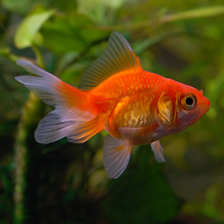

In [4]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

##### Performing Predictions using the classifier

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:

# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

The model correctly identified the image as goldfish. So the Mobile Net V2 is a reliable model.

### Load flowers dataset

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [12]:
data_dir

'.\\datasets\\flower_photos'

In [13]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

##### Read flowers images from disk into numpy array using opencv

In [15]:

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_images_dict 

{'roses': [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
  WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
  WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
  WindowsPath('

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [18]:
img.shape

(240, 179, 3)

In [19]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X

[array([[[ 0, 15,  6],
         [ 0, 15,  6],
         [ 0, 16,  7],
         ...,
         [24, 51, 31],
         [25, 52, 32],
         [26, 53, 33]],
 
        [[ 8, 22, 14],
         [ 8, 22, 14],
         [ 7, 21, 14],
         ...,
         [21, 47, 31],
         [24, 49, 34],
         [25, 51, 35]],
 
        [[12, 22, 15],
         [12, 22, 15],
         [11, 22, 14],
         ...,
         [21, 43, 31],
         [24, 46, 33],
         [26, 48, 36]],
 
        ...,
 
        [[17, 29, 25],
         [14, 25, 20],
         [13, 22, 15],
         ...,
         [ 2, 11,  2],
         [ 0,  7,  1],
         [ 0,  4,  0]],
 
        [[19, 30, 28],
         [18, 28, 25],
         [16, 25, 19],
         ...,
         [ 2, 10,  2],
         [ 1,  8,  2],
         [ 0,  7,  2]],
 
        [[ 9, 19, 19],
         [15, 23, 22],
         [19, 27, 24],
         ...,
         [ 1, 11,  2],
         [ 2, 10,  3],
         [ 3, 11,  4]]], dtype=uint8),
 array([[[11, 17, 16],
         [15, 18, 1

In [22]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Train test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train

[array([[[ 71,  83,  81],
         [ 63,  72,  67],
         [ 65,  69,  63],
         ...,
         [ 48,  39,  36],
         [ 48,  39,  36],
         [ 48,  39,  36]],
 
        [[ 59,  66,  65],
         [ 59,  65,  60],
         [ 65,  67,  61],
         ...,
         [ 48,  39,  36],
         [ 48,  39,  36],
         [ 50,  41,  38]],
 
        [[ 56,  57,  56],
         [ 61,  62,  58],
         [ 64,  64,  58],
         ...,
         [ 48,  39,  36],
         [ 49,  40,  37],
         [ 50,  42,  39]],
 
        ...,
 
        [[ 49, 127,  96],
         [ 38,  67,  50],
         [ 52,  68,  49],
         ...,
         [205, 229, 230],
         [185, 205, 207],
         [193, 193, 199]],
 
        [[ 52, 131, 101],
         [ 46,  67,  51],
         [ 49,  69,  49],
         ...,
         [202, 219, 222],
         [204, 203, 207],
         [168, 141, 147]],
 
        [[ 57, 133, 106],
         [ 46,  61,  49],
         [ 51,  82,  62],
         ...,
         [251, 251, 253],
  

### Preprocessing & Scaling

In [24]:
X_train_scaled = np.array(X_train)/255.
X_test_scaled = np.array(X_test)/255.

X[0].shape

(224, 224, 3)

### Now take pre-trained model and retrain it using flowers images

Here we take the Mobile Net V2 model and we skip the last layer.

When the last layer is not skipped we use the following script
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))])


When we skip the last layer, then we use the following script ("classification" replaced by "feature vector")
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

We skip the last layer when we have tp retrain a model using pre-trained model

In [25]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [26]:

num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['acc'])
model_history = model.fit(X_train_scaled, np.array(y_train), epochs=5)

Epoch 1/5
86/86 [==============================] - 46s 428ms/step - loss: 0.8046 - acc: 0.6948
Epoch 2/5
86/86 [==============================] - 27s 318ms/step - loss: 0.4119 - acc: 0.8586
Epoch 3/5
86/86 [==============================] - 27s 309ms/step - loss: 0.3150 - acc: 0.8964
Epoch 4/5
86/86 [==============================] - 26s 304ms/step - loss: 0.2669 - acc: 0.9172
Epoch 5/5
86/86 [==============================] - 26s 300ms/step - loss: 0.2313 - acc: 0.9306


Here we observe that accuracy increased immediately after 1st epoch from 69% to 85% and by 5th epoch it exceeds 90% with very little computation.

In [28]:
model_history.history.keys()

dict_keys(['loss', 'acc'])

dict_keys(['loss', 'acc'])


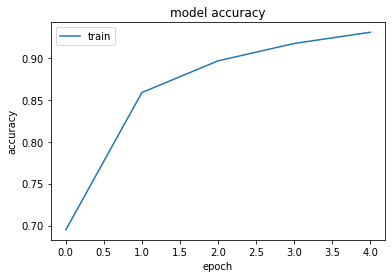

<function matplotlib.pyplot.clf()>

In [30]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf

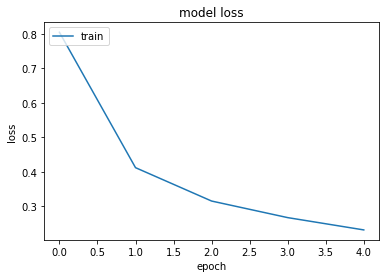

<function matplotlib.pyplot.clf()>

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf

In [32]:
model.evaluate(X_test_scaled,np.array(y_test))

29/29 [==============================] - 8s 280ms/step - loss: 0.3714 - acc: 0.8747


[0.3714274764060974, 0.8747276663780212]

When tried on test data, we see an accurace of 87%